<a href="https://colab.research.google.com/github/mugdhaWeb/Band-Name-Generator/blob/main/Assignment_T4_Modeling_a_Mystery_Pathogen_(SOLUTIONS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment T4: Modeling a Mystery Pathogen (SOLUTIONS)**

*Assignment written by Aleks Jovcic, Alex Tsun, and Adam Pahlavan*

In the following assignment, you will conduct your first foray into Machine Learning with Multiple Linear Regression, Feature Manipulation, and LASSO Regression!

---

## Overview
In this assignment you will be working with a simulated dataset that we've created called `T4_data.txt`. This simulated dataset represents the fictional scenario of the mysterious **Disease Q** spreading through populations. You are taking the role of a data scientist who has been tasked with gleaning from this data information that could be beneficial in the fight against the mysterious pathogen.

Each row in the data is a single **data point**, which represents a **population region**, and contains values for each of 4 columns. You are going to be writing code throughout this assignment to try and predict the label column $Y$, based on the three feature columns, $X_1, X_2,$ and $X_3$. Remember that this is the crux of Machine Learning: predicting **labels** based on **features**.

Let's talk about what each of these columns represent:
* $Y$: Represents the percent of the population that has been infected with Disease Q 10 days after the first case.
* $X_1$: Represents the average number of cars passing a common toll booth on the border of this population region per minute over this 10 day period. If the value is positive, that means more cars are coming *into* the region than are leaving, and if it is negative, the opposite is true. *(E.g.: a value of 7.32 means that on average, 7.32 more cars drove into this region than out of it, per minute).*
* $X_2$: Represents the change in the average amount of people in outdoor spaces at peak hours since the first case. A positive value means, generally, the amount of people outside has increased. *(E.g.: A value of -3.09 means that there are, on average, 3.09 less people in a given outdoor space at the end of these 10 days, then there were at the start).*
* $X_3$: Represents the average number of one-time-use masks being produced per hour in this region. If the number is positive, it means they are being produced in excess, and if it is negative, that means that they are being used faster than they are being produced. *(E.g: A value of exactly 0, means that, on average, masks are being used and expended as fast as they are being produced).*

The data we have provided is 100,000 rows of data points, each of which is a region. Over the course of this assignment, you are going to train various Machine Learning models to learn from this data, and be able to make predictions as to how much of a population will be infected based on the practices of the area.

Obviously, this data is a simplified version of how such things work, and a Machine Learning model will rarely work as well as they will in this assignment. However, hopefully the real-world connections to this are apparent. The techniques we are going to use are real techniques employed in Machine Learning all the time, and are generalizable to so many topics, issues, and experiments. What we hope to demonstrate, above all else, is the power of Machine Learning, and how that power is in your hands.

*Digression: You may notice throughout the assignment parts marked as "Digressions", like this one. This just means these bits of information are not necessary to complete the assignment, but you may find them interesting.*

# Before Starting: Save a Copy in Drive

BEFORE YOU DO ANYTHING ELSE, make sure you save a copy of this Colab Notebook in your Google Drive by clicking *File -> Save a Copy in Drive*. By default, the Colab will be saved in *My Drive -> Colab Notebooks*. Since the original link is view-only, any edits you make will not be saved after you close the tab. Please refer to the image below:


<img src="https://drive.google.com/uc?export=download&id=1a2maN-szhK79yuy9zFjqlSrUdyzJxL4g" width="300" />

---

# Problem 1: Multiple Linear Regression

In Problem 1, you will be performing Multiple Linear Regression as we've shown in lecture.

## **(1a) Hypothesize the Relationship**

Before we go about manipulating our data, we need to make a hypothesis as to how it is related. For each of the 3 features ($X_1$, $X_2$, and $X_3$), hypothesize what kind of relationship it has with the label ($Y$). Does it have a positive, polynomial relationship? What abot a negative, linear relationship? In other words, what impact do you think each of these features has on the label (what percentage of the population is infected with Disease Q)?

<font color='CC6600'> I would hypothesize that $X_1$ has a positive, linear relationship (more cars coming in means more people are infected), $X_2$ has a similarily positive, linear relationship (more people outside means more opportunity for transmission), and $X_3$ has a linear, negative relationship (more masks being produced means lower chance of transmission).

## **(1b) Setup and Loading Data**

To start, running the following two cells to import most of the necessary libraries for this assignment (there are some libraries it will be on you to import yourself later) and load in the dataset. After running the second cell, the data will be in the form of a numpy array called `data`.

Note that `data` is a numpy array, and thus we do not have the luxury of column names. Know that columns 0, 1, 2, and 3 represent $X_1$, $X_2$, $X_3$, and $Y$ respectively.

*Digression: You'll notice that we first use `pd.read_csv` to load in the data. This is because numpy doesn't have the capability to load data from a URL like Pandas does. However, we want our data in the form of a numpy array for ease of usage later. For this reason, we then convert it to a numpy array using `data.to_numpy()`. This is a wonderful example of the libraries we're using playing nicely with each other.*

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
DATA_URL = 'https://drive.google.com/uc?export=download&id=1Kk4GGBc9GYD3yJv9gNAuHznCKbYn4AU5'

data = pd.read_csv(DATA_URL, names=["X1", "X2", "X3", "y"], header=0)

data = data.to_numpy()

data

array([[  0.31067321,   3.58705809, -14.74152841,  22.85653472],
       [  2.15902988,   1.05183608,   4.78644108,  16.84843659],
       [  7.62320217,  -4.37078052,  -4.81588852,  24.62265439],
       ...,
       [  5.7867169 ,  -1.26512953,  16.61337466,  18.5815376 ],
       [ -3.96598324,   4.7914319 ,  13.93511575,  14.15450107],
       [  1.09613082,   0.04386569,   7.37711117,  13.28239108]])

## **(1c) Splitting into Train, Val, and Test**

Split `data` into `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, and `y_test` in ratios of 80%, 10%, and 10%.

*Hint: Use the numpy function [np.split()](https://numpy.org/devdocs/reference/generated/numpy.split.html)*

*Digression: You may notice (and be annoyed by) the fact that X is capitalized while y is not. The reason for this is that under ML convention, X is capitalized because it is a matrix, whereas y is lowercase because it is a vector.*


In [ ]:
# TODO
X, y = data[:, :3], data[:, 3]

X_train, X_val, X_test = np.split(X, [int(X.shape[0] * 0.8), int(X.shape[0] * 0.9)])
y_train, y_val, y_test = np.split(y, [int(y.shape[0] * 0.8), int(y.shape[0] * 0.9)])

## **(1d) Creating and Fitting a Multiple Linear Regression Model**

Create a Multiple Linear Regression model called `model`, train it on `X_train` and `y_train`, and print the weights and bias. You will first need to import `LinearRegression` from `sklearn.linear_model`.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.*

In [ ]:
# TODO
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
weights = model.coef_
bias = model.intercept_
print(weights)
print(bias)

[ 1.2947664   1.19953399 -0.49847589]
19.013167046965712


## **(1e) Giving the Y-hat Equation**

Based on the weights and bias you recieved from your Linear Regression model, write an equation for $\hat{Y}$ in $\LaTeX$. Round your weights to two decimal places.

*Hint: To find out how to write $\hat{Y}$ in $\LaTeX$, double click on this text box!*

<font color='CC6600'> $\hat{Y} = 1.29X_1 + 1.20X_2 - 0.50X_3 + 19.01$

## **(1f) Finding Train and Val MSE**

Find and print the Mean Squared Error (MSE) for `model`'s prediction on the Train set, as well as the MSE for `model`'s prediction on the Val set. You will first need to import `mean_squared_error` from `sklearn.metrics`.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function.*

In [ ]:
# TODO
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
print(mean_squared_error(y_val, y_val_pred))

23.094446062096804
21.17902071534869


If you did the above calculation correctly, you should notice that the MSE are not terrible but also have a large margin for improvement. As responsible data scientists, it is our job to figure out why this is the case and if we can do better. To start, we'll need to investigate our data a bit. We can start doing this by making what are called **marginal plots**.

## **(1g) Marginal Plots**

In T3, we were able to make a scatter plot of our two variables directly and describe their approximate relationship. Unfortunately, in this assignment, we have 3 features and 1 label (called 3-dimensional data). Thus, it is difficulty (nigh-impossible) to do anything like graphing all our features vs. all our data.

However, what we can do is make what are called **marginal plots**. Marginal plots are scatter plots comparing a single feature to the label. This allows us to see if there are any potential underlying behaviors occuring with any of our individual features.

In the three cells below, make and show three scatter plots comparing each of the three features ($X_1$, $X_2$, and $X_3$) to $Y$. Each plot should have a descriptive title and axes labels. In the text boxes, give a qualitative description of the relationship you see in the scatter plots. You will have to import `matplotlib.pyplot`.

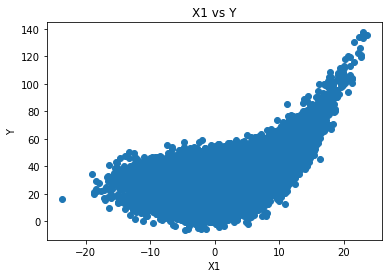

In [ ]:
# TODO
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 3])
plt.title("X1 vs Y")
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a positive, polynomial relationship, with moderate to significant heteroscedasticity.

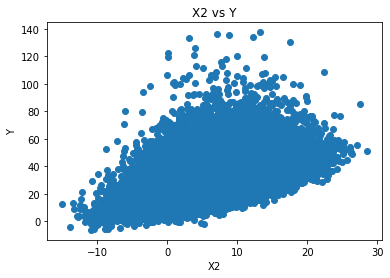

In [ ]:
# TODO
plt.scatter(data[:, 1], data[:, 3])
plt.title("X2 vs Y")
plt.xlabel("X2")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a linear, positive relationship, with moderate to significant heteroscedasticity.

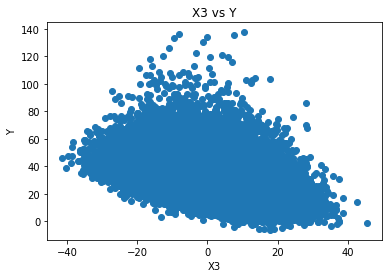

In [ ]:
# TODO
plt.scatter(data[:, 2], data[:, 3])
plt.title("X3 vs Y")
plt.xlabel("X3")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a linear, negative relationship, with moderate to significant heteroscedasticity.

*Digression: You may notice that some of the data points for variable Y go above 100%. This is to represent a scenario in which the immediate population of a region actually increases in the given 10 days (perhaps it is a popular vacation destination and a large population flocks there despite the ongoing spread of Disease Q).*

---

# Problem 2: Transforming the Data

If you created your marginal plots in Problem 1 correctly, you should have seen that $X_1$ doesn't seem to have a linear relationship with $Y$; in fact, the scatterplot is curved and resembles a higher order poynomial degree relationship! On the other hand, the marginal plots of $X_2$ and $X_3$ more-so resemble linear relationships, albeit with moderate heteroskedasticity.

We will now investigate the $X_1$ variable further  and see if anything can be done to improve our model. As we saw, the val MSE we got wasn't great. Perhaps this is a way to fix that!

## **(2a) Feature Manipulation (Making X1 Polynomial)**

The first thing we will do is **transform** our data by making X polynomial. Create a new numpy array `trans_X`, which contains the following columns (in order from left to right):

> $X_1$, $X_1^2$, $X_1^3$, $X_1^4$, $X_1^5$, $X_2$, $X_3$

We don't necessarily know if X is going to have behavior all the way up to the 5th degree, but we're generating columns up until that point in the hopes of finding out exactly what kind of polynomial relationship it has!

In [ ]:
# TODO
DEGREE = 5
n = X.shape[0]
trans_X = np.repeat(X[:, 0], DEGREE).reshape((n, DEGREE))

for i in range(2, DEGREE + 1):
  trans_X[:, i-1] **= i

trans_X = np.hstack((trans_X, X[:, 1:]))

## **(2b) Marginal Plots**

Once again, we are going to be making marginal plots. This time, however, we are going to make **5** plots, one for each degree of $X_1$. Do this in each of the following code blocks, and enter a written answer once again giving a brief, qualitative description of the graph.

As before, show each graph and give them each a descriptive title and axes labels.

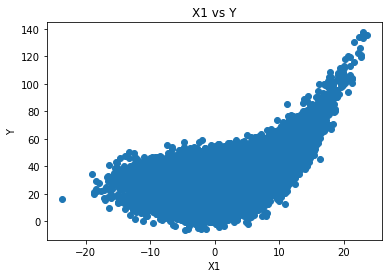

In [ ]:
# TODO
plt.scatter(trans_X[:, 0], y)
plt.title("X1 vs Y")
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a positive, polynomial relationship, with moderate to significant heteroscedasticity.

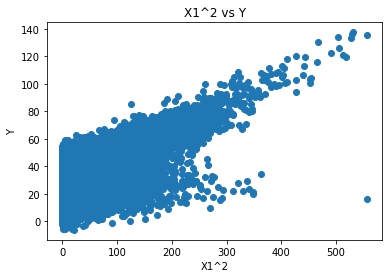

In [ ]:
# TODO
plt.scatter(trans_X[:, 1], y)
plt.title("X1^2 vs Y")
plt.xlabel("X1^2")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a generally linear, positive, relationship. (Note that there would be several other acceptable answers here since this graph has a peculiar shape)

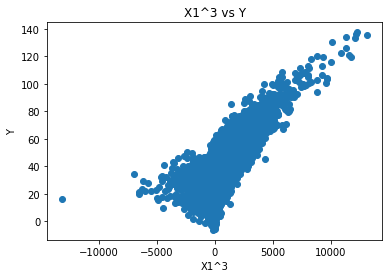

In [ ]:
# TODO
plt.scatter(trans_X[:, 2], y)
plt.title("X1^3 vs Y")
plt.xlabel("X1^3")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a generally linear, positive, relationship. (Note that there would be several other acceptable answers here since this graph has a peculiar shape)

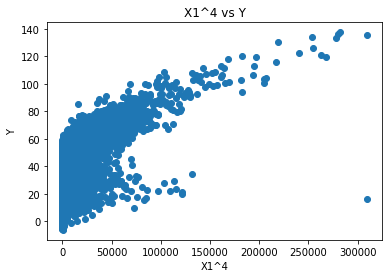

In [ ]:
# TODO
plt.scatter(trans_X[:, 3], y)
plt.title("X1^4 vs Y")
plt.xlabel("X1^4")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a generally linear, positive, relationship. (Note that there would be several other acceptable answers here since this graph has a peculiar shape)

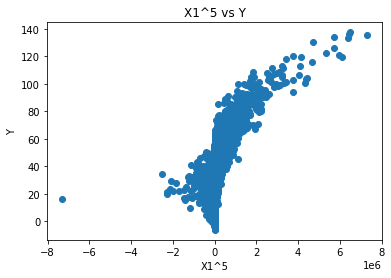

In [ ]:
# TODO
plt.scatter(trans_X[:, 4], y)
plt.title("X1^5 vs Y")
plt.xlabel("X1^5")
plt.ylabel("Y")
plt.show()

<font color='CC6600'> Looks like a generally linear, positive, relationship. (Note that there would be several other acceptable answers here since this graph has a peculiar shape)

If you made these marginal plots correctly, you should see that the untransformed $X_1$ looks the same, but that each higher degree transformation looks mostly linear (albeit getting stranger as they get higher). There's not too much we can glean from this about the exact behavior of $X_1$ unfortunately, however it does seem to support our suspicions that there is some higher-degree behavior underlying the relationship between $X_1$ and $Y$.

## **(2c) Standardizing the Data**

The next step in transforming our data is going to be to **standardize** it. This is the process by which we put our features into **z-score space**. This is a very important process because it makes sure that differing scales of units do not become an issue when we apply the LASSO penalty in problem 3.

Create a new numpy array `trans_standard_X`, containing the standardized version of `trans_X`.

*Digression: You may be wondering why we aren't transforming $Y$ as well. While there would be nothing wrong with transforming $Y$ to Z-space as well, it would not be necessary in the same way that standardizing the $X$ variables would be. When it comes to Ridge and LASSO regression, all the matters is that the relative scale of the $X$ variables is the same; that way, the Ridge and LASSO penalties are applied to all input variables equally, and no input term gets a boost in importance just because its scale happened to be bigger.*

In [ ]:
# TODO
means = np.mean(trans_X, axis=0)
stds = np.std(trans_X, axis=0)

trans_standard_X = trans_X.copy()
trans_standard_X -= means
trans_standard_X /= stds

## **(2d) Splitting Into Train, Val, and Test**

Split `trans_standard_X` into `trans_standard_X_train`, `trans_standard_X_val`, and `trans_standard_X_test` in ratios of 80%, 10%, and 10%.

*Hint: Use the numpy function [np.split()](https://numpy.org/devdocs/reference/generated/numpy.split.html)*

In [ ]:
# TODO
trans_standard_X_train, trans_standard_X_val, trans_standard_X_test = np.split(trans_standard_X, [int(trans_standard_X.shape[0] * 0.8), \
                                                                                                  int(trans_standard_X.shape[0] * 0.9)])

## **(2e) Creating and Fitting a NEW Multiple Linear Regression Model**

Create a NEW Multiple Linear Regression model called `trans_model`, train it on `trans_standard_X_train` and `trans_standard_y_train`, and print the weights and bias.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.*

In [ ]:
# TODO
trans_model = LinearRegression()
trans_model.fit(trans_standard_X_train, y_train)
weights = trans_model.coef_
bias = trans_model.intercept_
print(weights)
print(bias)

[ 2.99908085  3.96883154  2.02035083  0.0252529  -0.02274943  5.99554031
 -4.99659815]
30.001580081441045


## **(2f) Giving the Y-hat Equation**

Based on the weights and bias you recieved from your new Linear Regression model, write a NEW equation for $\hat{Y}$ in $\LaTeX$. Round your weights to two decimal places.

*Hint: To find out how to write $\hat{Y}$ in $\LaTeX$, double click on this text box!*

<font color='CC6600'> $\hat{Y} = 3.0X_1 + 3.97X_1^2 + 2.02X_1^3 + 0.03X_1^4 - 0.02X_1^5 + 6.0X_2 - 5.0X_3 + 30.00$

If you fit your model correctly, you should notice that the weights for $X_1^4$ and $X_1^5$ round to 0! This likely means that $X_1$ has only a cubic relationship to $Y$, and not any degree higher. To verify that, let's find the Train and Val MSE again to see if it's any better with our transformed data. If they're sufficiently low, we can infer that our model is an accurate one, and that having cubic behavior is an accurate assessment.

## **(2g) Finding Train and Val MSE**

Find and print the Mean Squared Error (MSE) for `trans_model`'s prediction on the transformed, standardized Train set, as well as the MSE for `trans_model`'s prediction on the transformed, standardized Val set.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function.*

In [ ]:
# TODO
y_train_pred = trans_model.predict(trans_standard_X_train)
print(mean_squared_error(y_train, y_train_pred))

y_val_pred = trans_model.predict(trans_standard_X_val)
print(mean_squared_error(y_val, y_val_pred))

3.993058530084894
3.9809519454123583


If you've done everything right up until this point, you should find that the MSE's are much better than before! This is promising, and means that we have likely found a much better relationship between our features and our label.

---

# [Optional Challenge] Problem 3: LASSO Regression

*The following question is an optional challenge for assignment T4.*

As we talked about in lecture, LASSO regression is a special type of multiple linear regression that penalizes high weights. How much high weights are penalized is based on a **hyperparameter** called **alpha**. Remember that a hyperparameter is something that we, the user, sets for a model, NOT something that the model learns on its own (those are called *parameters*). We're going to be using LASSO in this investigation for two reasons:

* We want to see if there are better MSE's that arise from different values of alpha.
* We want to use it to evaluate feature importance.

## **(3a) Creating and Fitting a LASSO Model With Default Alpha (1.0)**

Create a LASSO Regression model called `lasso`, with the default alpha value of 1.0, train it on `trans_standard_X_train` and `trans_standard_y_train`, and print the weights and bias.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class.*

In [ ]:
# TODO
lasso = sklearn.linear_model.Lasso()
lasso.fit(trans_standard_X_train, y_train)
weights = lasso.coef_
bias = lasso.intercept_
print(weights)
print(bias)

[ 2.38393034  3.35531207  1.91412245  0.          0.          4.9879278
 -3.98385991]
30.006176402678996


You should notice that we get slightly different weights this way. Let's find the train and val MSE's to see if these different weights make any difference.

## **(3b) Finding Train and Test MSE**

Find and print the Mean Squared Error (MSE) for `lasso`'s prediction on the transformed, standardized Train set, as well as the MSE for `lasso`'s prediction on the transformed, standardized Val set.

*Hint: If you are unsure how to perform these tasks, try reading the documentation for sklearn's [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function.*

In [ ]:
# TODO
y_train_pred = lasso.predict(trans_standard_X_train)
print(mean_squared_error(y_train, y_train_pred))

y_val_pred = lasso.predict(trans_standard_X_val)
print(mean_squared_error(y_val, y_val_pred))

7.352974450231856
7.321259272993379


If you did everything right, you should find that both MSE's are somewhat worse than they were in Problem 2(g). Let's see if this trend continues as alpha increases.

## **(3c) Trying Various Alpha Values**

Try alpha values from 0 to 10 (inclusive), stepping in increments of 0.1, obtaining the weights, Train MSE, and Val MSE for each alpha value tried.

Store this information in a new numpy array called `lasso_data`. Column 0 should be the alpha values, columns 1 through 7 (inclusive) should be the obtained weights, and columns 8 and 9 should be the Train and Val MSE's respectively.

You might see the following UserWarning when you run your code:

```
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
```

Don't worry about this, your code should run fine despite this warning.

*Hint: Generate the array `lasso_data` first, with all the alpha values as a column and the other 10 values being filled with zeroes.*

In [ ]:
# TODO
lasso_data = np.arange(0, 10.1, 0.1).reshape((101, 1))
lasso_data = np.hstack((lasso_data, np.zeros((101, 9))))

for row in lasso_data:
  alpha = row[0]
  
  lasso = sklearn.linear_model.Lasso(alpha=alpha)
  lasso.fit(trans_standard_X_train, y_train)
  row[1:8] = lasso.coef_
  
  y_train_pred = lasso.predict(trans_standard_X_train)
  row[8] = mean_squared_error(y_train, y_train_pred)

  y_val_pred = lasso.predict(trans_standard_X_val)
  row[9] = mean_squared_error(y_val, y_val_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159722.34120339592, tolerance: 1003.3927336246397
  positive)


## **(3d) Plotting a LASSO Path**

Plot a line graph with alpha on the x-axis, and weight on the y-axis, with a line for each of the features from our transformed X.

As before, show the graph and give it a descriptive title and axes labels. This time, also give your graph a legend indicating which line is which feature.

Also, write a text answer describing the LASSO path and any information you can glean from it. Consider the slopes of the paths, what value they converge to, which feature converges last, etc...

*Hint: To plot multiple lines on one set of axes, simply call `plt.plot()` multiple times before calling `plt.show()`. To have a legend, pass in the parameter `label` to each call to `plt.plot()`, and call `plt.legend()` before you show the graph.*

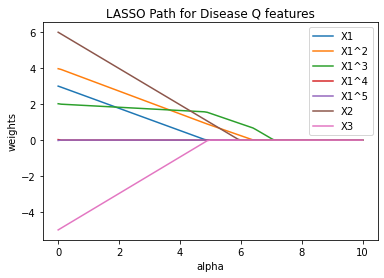

In [ ]:
# TODO
plt.plot(lasso_data[:, 0], lasso_data[:, 1], label="X1")
plt.plot(lasso_data[:, 0], lasso_data[:, 2], label="X1^2")
plt.plot(lasso_data[:, 0], lasso_data[:, 3], label="X1^3")
plt.plot(lasso_data[:, 0], lasso_data[:, 4], label="X1^4")
plt.plot(lasso_data[:, 0], lasso_data[:, 5], label="X1^5")
plt.plot(lasso_data[:, 0], lasso_data[:, 6], label="X2")
plt.plot(lasso_data[:, 0], lasso_data[:, 7], label="X3")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO Path for Disease Q features")
plt.legend()
plt.show()

<font color='CC6600'> This LASSO path shows us some really interesting behavior. For one, as we expect, all weights eventually reach 0 as alpha increases. This is because as alpha increases, we so heavily penalize high weights that all weights have to be 0. Beyond that, however, we see that different weights travel to 0 at different rates, and that the features that have a higher weight to begin take longer. This makes sense, as having a higher weight likely means the feature is of greater importance. Finally, we can see that $X_1^3$ is the last to reach 0, even though it has the smallest (non-zero) initial weight of the entire $X_1$ transformation group. This makes sense, as even though it might technically have a smaller weight, this means that $X_1$ is strongly cubic in its behavior, and that the lower-degree behavior is dwarfed by this cubic behavior. Given what $X_1$ represented, the amount of people coming into the population region, it makes sense. The more people that come in, the more that they spread the disease or bring it from elsewhere, and the amount infected skyrockets.

## **(3e) Plotting Train and Val MSE**

Plot Train and Val MSE on one graph against different values of alpha. As before, show the graph, give it a descriptive title and axes labels, and give your graph a legend indicating which line is which MSE.

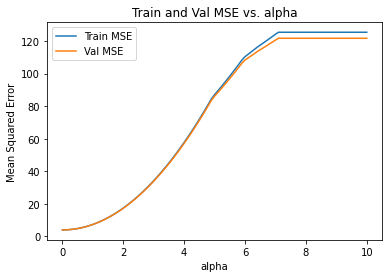

In [ ]:
# TODO
plt.plot(lasso_data[:, 0], lasso_data[:, 8], label="Train MSE")
plt.plot(lasso_data[:, 0], lasso_data[:, 9], label="Val MSE")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")
plt.title("Train and Val MSE vs. alpha")
plt.legend()
plt.show()

You should notice that Train and Val MSE are closely linked! This is not too unusual. You'll also notice that the lowest MSE seems to be when alpha is equal to 0! This makes sense, based on what we noticed before when fitting LASSO with alpha set to 1.0.

## **(3f) Final LASSO Model**

Given the information obtained from the MSE graph, pick an alpha value as your ideal value and justify your choice. Make one final LASSO model, passing in your ideal alpha value. Fit it on the transformed, standardized Train set, and print the weights and bias.

*Hint: The ideal alpha will most likely not be 0! 0 has the lowest MSE, but there are other benefits to a higher alpha that might be worth a slightly higher MSE.*

In [ ]:
# TODO
lasso = sklearn.linear_model.Lasso(alpha=0.5)
lasso.fit(trans_standard_X_train, y_train)
weights = lasso.coef_
bias = lasso.intercept_
print(weights)
print(bias)

[ 2.69282439  3.67160043  1.95898924  0.          0.          5.49173139
 -4.49022685]
30.00388024520335


<font color='CC6600'> *We will guess that the ideal alpha value is 0.5, since at that point you get a good trade-off between regularization and RSS.*

## **(3g) Finding Train, Val, and Test MSE**

Find and print the Train and Val MSE one last time, this time with this final LASSO model. Also find the Test MSE (notice that we only looked at the Test Set *once*)!

In [ ]:
# TODO
y_train_pred = lasso.predict(trans_standard_X_train)
print(mean_squared_error(y_train, y_train_pred))

y_val_pred = lasso.predict(trans_standard_X_val)
print(mean_squared_error(y_val, y_val_pred))

y_test_pred = lasso.predict(trans_standard_X_test)
print(mean_squared_error(y_test, y_test_pred))

4.832896400435874
4.820768821543074
4.857434821856294


You'll notice that the Test MSE is slightly higher, but not incredibly so. This is likely due to just minor deviations in the data, and is nothing to worry about.

## **(3h) Giving the Y-hat Equation**

Finally, based on the weights and bias you recieved from your final LASSO model, write an equation for $\hat{Y}$ in $\LaTeX$. Round your weights to two decimal places.

<font color='CC6600'> $\hat{Y} = 2.69X_1 + 3.67X_1^2 + 1.96X_1^3 + 5.49X_2 - 4.49X_3 + 30.00$